<a href="https://colab.research.google.com/github/naveen3par/Resume/blob/main/naveen_paramasivan_hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_bokeh

pd.set_option('display.max_rows', 100)
#pd.set_option('plotting.backend', 'pandas_bokeh')
#pandas_bokeh.output_notebook()

In [ ]:
!wget -nc = 'https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv'

--2024-04-21 04:08:03--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2024-04-21 04:08:03--  https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84835 (83K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  82.85K  --.-KB/s    in 0.004s  

2024-04-21 04:08:03 (18.5 MB/s) - ‘titanic.csv’ saved [84835/84835]

FINISHED --2024-04-21 04:08:03--
Total wall clock time: 0.2s
Downloaded: 1 files, 83K in 0.004s (18.5 MB/s)


In [ ]:
titanic_raw = pd.read_csv('titanic.csv')

titanic_raw.head(5)
titanic_raw.shape


(1309, 11)

In [ ]:
df_titanic = titanic_raw
df_titanic.isnull().sum()

df_titanic = df_titanic.drop(['cabin'], axis=1)
df_titanic = df_titanic.dropna(axis=0)
df_titanic.shape

df_titanic = df_titanic.drop_duplicates()
df_titanic.shape

df_titanic = df_titanic.drop(['ticket', 'name'], axis=1)
df_titanic.shape

(1043, 8)

In [ ]:
df_titanic['familysize'] = df_titanic['sibsp'] + df_titanic['parch'] + 1
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familysize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
bins = [0, 2, 12, 18, 65, 99]
labels = ['Infant', 'Child', 'Teenager', 'Adult', 'Senior']
df_titanic['agegroup'] = pd.cut(df_titanic['age'], bins=bins, labels=labels, right=False)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,familysize,agegroup
0,0,3,male,22.0,1,0,7.2500,S,2,Adult
1,1,1,female,38.0,1,0,71.2833,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,S,1,Adult
3,1,1,female,35.0,1,0,53.1000,S,2,Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Adult


Text(0.5, 1.0, 'Distribution of Age Groups on Titanic')

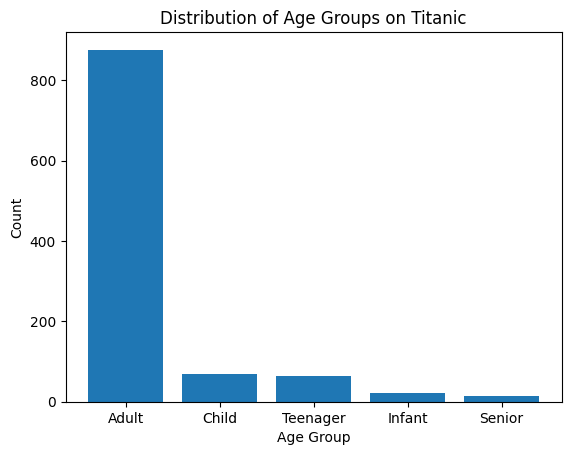

In [ ]:
agegroup_count = df_titanic['agegroup'].value_counts()

plt.bar(agegroup_count.index, agegroup_count.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups on Titanic')

In [ ]:
df_titanic['agegroup'].value_counts()

agegroup
Adult       876
Child        69
Teenager     63
Infant       22
Senior       13
Name: count, dtype: int64

In [ ]:
# Homework 10 starts here.

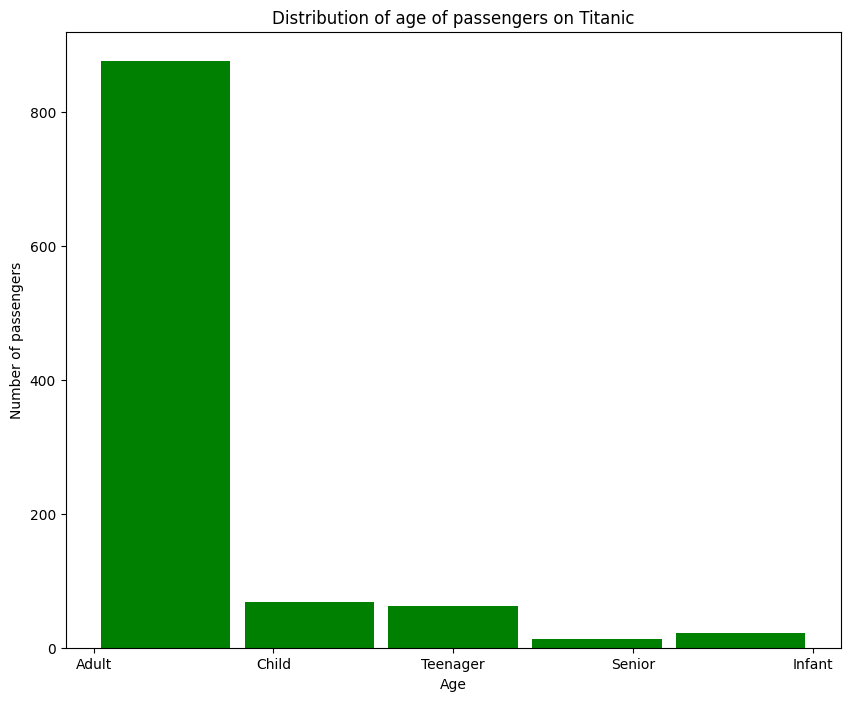

In [ ]:
# Part 3 - Histogram

fig, ax = plt.subplots(figsize=(10,8), dpi=100)

# set title and axis labels
plt.title(label='Distribution of age of passengers on Titanic')
plt.xlabel('Age')
plt.ylabel('Number of passengers')

plt.hist(df_titanic['agegroup'], bins=5, color='green', rwidth=0.9)

plt.show()

sex
male      657
female    386
Name: count, dtype: int64


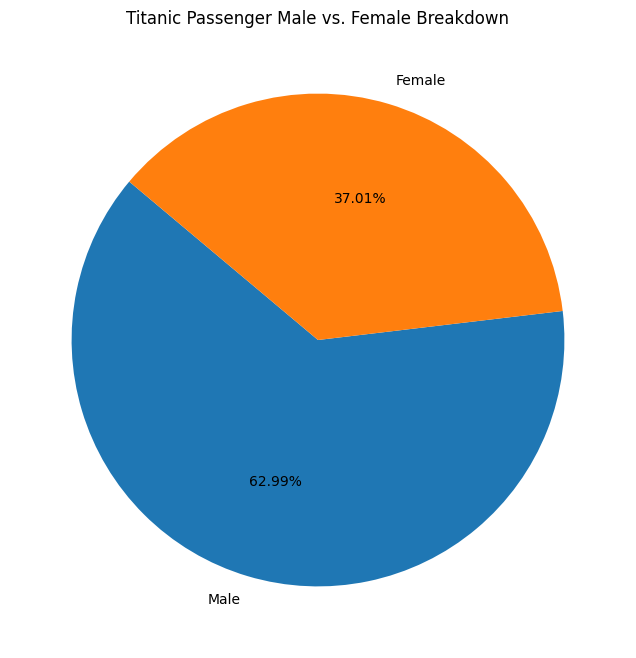

In [ ]:
# Part 4 - Pie Chart

print(df_titanic['sex'].value_counts())

fig, ax = plt.subplots(figsize=(14,8), dpi=100)

pie_chart_labels = ['Male', 'Female']

plt.title(label='Titanic Passenger Male vs. Female Breakdown')
plt.pie(df_titanic['sex'].value_counts(), labels=pie_chart_labels, autopct='%1.2f%%', startangle = 140)

plt.show()

   pclass  survived
0       1  0.773050
1       2  0.655172
2       3  0.458000


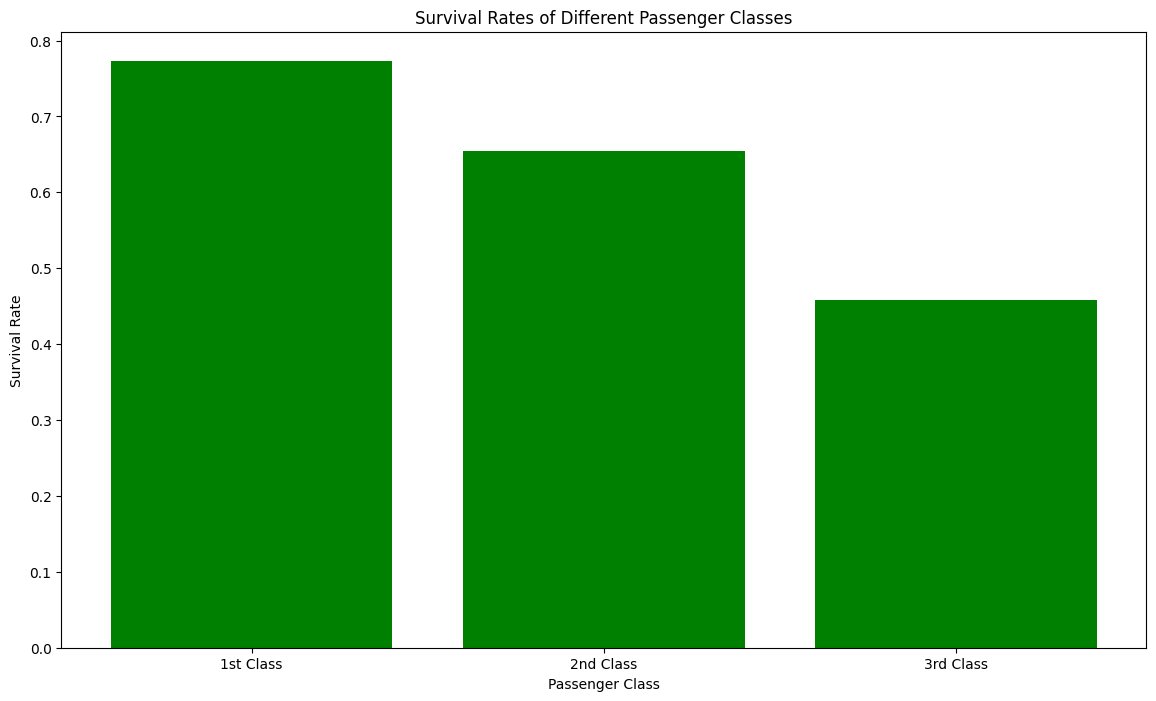

In [ ]:
# Part 5 - Bar Chart

survival_rate = df_titanic.groupby('pclass')['survived'].mean()
df_survival_rate = survival_rate.to_frame().reset_index()
print(df_survival_rate)

fig, ax = plt.subplots(figsize=(14,8), dpi=100)

plt.title(label='Survival Rates of Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'], rotation=0)

plt.bar(x=df_survival_rate['pclass'], height=df_survival_rate['survived'], color='green', width=0.8)
plt.show()

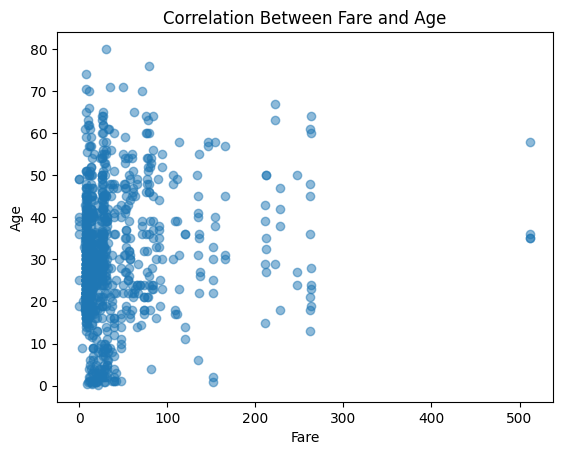

In [ ]:
# Part 6 - Scatter Plot

plt.title("Correlation Between Fare and Age")
plt.xlabel('Fare')
plt.ylabel('Age')
plt.scatter(df_titanic['fare'], df_titanic['age'], alpha=0.5)

plt.show()


   agegroup       fare
0    Infant  28.508523
1     Child  30.953258
2  Teenager  33.332213
3     Adult  37.323596
4    Senior  47.583985


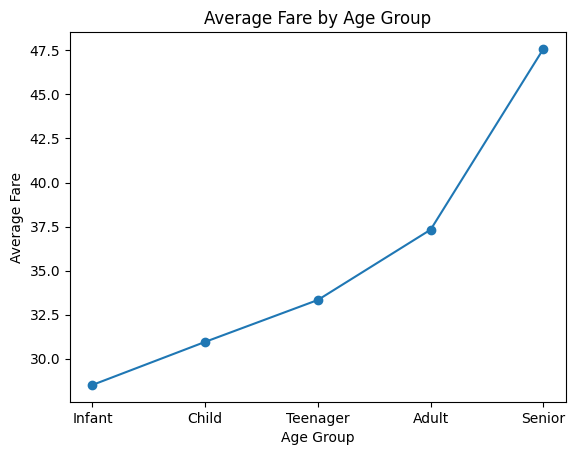

In [ ]:
# Part 7 - Line plot
average_fare = df_titanic.groupby('agegroup')['fare'].mean()
df_average_fare = average_fare.to_frame().reset_index()
print(df_average_fare)

plt.title("Average Fare by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Average Fare')

plt.plot(df_average_fare['agegroup'], df_average_fare['fare'], marker='o')
plt.show()